# Team 1 - Chocolate Bar

![](https://img.newatlas.com/cocoa-tree-domestication-chocolate-1.jpg?auto=format%2Ccompress&ch=Width%2CDPR&fit=crop&h=347&q=60&rect=0%2C18%2C1620%2C911&w=616&s=2c0f902d21b734d77c99fd13171fb979)

_For more information about the dataset, read [here](https://www.kaggle.com/rtatman/chocolate-bar-ratings)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- There are lots of poorly labeled data in `Broad Bean Origin` column.
- There are some rows in `Broad Bean Origin` with multiple values, those values will create errors in our data. 
- How can we get rid of the `%` sign in `Cocoa Percent` column?
- And more...

# My solution

In [0]:
import io
import re

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [0]:
link = 'https://raw.githubusercontent.com/nnbtam99/coderschool-ds-t2-t4/master/W04%20-%20Data%20manipulation%20%2B%20Visualization/01%20-%20Chocolate%20Bar%20Ratings/flavors_of_cacao.csv'

df = pd.read_csv(link)

## Data cleaning

### Normalize column names

In [0]:
new_columns = ['company', 'specific_origin', 'REF', 'review_date', 'cocoa_percent', 'company_location', 'rating', 'bean_type', 'broad_origin']
df.columns = new_columns

In [120]:
df.head().T

,0,1,2,3,4
company,A. Morin,A. Morin,A. Morin,A. Morin,A. Morin
specific_origin,Agua Grande,Kpime,Atsane,Akata,Quilla
REF,1876,1676,1676,1680,1704
review_date,2016,2015,2015,2015,2015
cocoa_percent,63%,70%,70%,70%,70%
company_location,France,France,France,France,France
rating,3.75,2.75,3,3.5,3.5
bean_type,,,,,
broad_origin,Sao Tome,Togo,Togo,Togo,Peru


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
company             1795 non-null object
specific_origin     1795 non-null object
REF                 1795 non-null int64
review_date         1795 non-null int64
cocoa_percent       1795 non-null object
company_location    1795 non-null object
rating              1795 non-null float64
bean_type           1794 non-null object
broad_origin        1794 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


### Check each column to find poorly labeled data

In [122]:
# As Bean_Type and Broad_Bean_Origin may be optional attributes, we accept NaN values for these features
df.isna().sum()

company             0
specific_origin     0
REF                 0
review_date         0
cocoa_percent       0
company_location    0
rating              0
bean_type           1
broad_origin        1
dtype: int64

#### Check all values of each feature

In [123]:
df['company_location'].sort_values().unique()

# UK includes Ireland, Scotland, Wales and England, so the values are quite ambiguous --> Perhaps U.K in this context referes to England 
# Dominican Republic is mispelled
# Nicaragua is mispelled
# Amsterdam is a city of Netherlands, not a country --> So Amsterdam should be replaced with Netherlands

array(['Amsterdam', 'Argentina', 'Australia', 'Austria', 'Belgium',
       'Bolivia', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
       'Czech Republic', 'Denmark', 'Domincan Republic', 'Ecuador',
       'Eucador', 'Fiji', 'Finland', 'France', 'Germany', 'Ghana',
       'Grenada', 'Guatemala', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Lithuania', 'Madagascar',
       'Martinique', 'Mexico', 'Netherlands', 'New Zealand', 'Niacragua',
       'Nicaragua', 'Peru', 'Philippines', 'Poland', 'Portugal',
       'Puerto Rico', 'Russia', 'Sao Tome', 'Scotland', 'Singapore',
       'South Africa', 'South Korea', 'Spain', 'St. Lucia', 'Suriname',
       'Sweden', 'Switzerland', 'U.K.', 'U.S.A.', 'Venezuela', 'Vietnam',
       'Wales'], dtype=object)

In [124]:
# This column datatype is object, which is quite unreasonable
# I'll remove the '%' symbol and convert it to float 
df['cocoa_percent'].unique()

array(['63%', '70%', '60%', '80%', '88%', '72%', '55%', '75%', '65%',
       '85%', '73%', '64%', '66%', '68%', '50%', '100%', '77%', '90%',
       '71%', '83%', '78%', '74%', '76%', '86%', '82%', '69%', '91%',
       '42%', '61%', '73.5%', '62%', '67%', '58%', '60.5%', '79%', '81%',
       '57%', '72.5%', '56%', '46%', '89%', '99%', '84%', '53%', '87%'],
      dtype=object)

In [125]:
# Check if bean_type has mispelled or missing values
df['bean_type'].sort_values().unique()

array(['Amazon', 'Amazon mix', 'Amazon, ICS', 'Beniano', 'Blend',
       'Blend-Forastero,Criollo', 'CCN51', 'Criollo', 'Criollo (Amarru)',
       'Criollo (Ocumare 61)', 'Criollo (Ocumare 67)',
       'Criollo (Ocumare 77)', 'Criollo (Ocumare)', 'Criollo (Porcelana)',
       'Criollo (Wild)', 'Criollo, +', 'Criollo, Forastero',
       'Criollo, Trinitario', 'EET', 'Forastero', 'Forastero (Amelonado)',
       'Forastero (Arriba)', 'Forastero (Arriba) ASS',
       'Forastero (Arriba) ASSS', 'Forastero (Catongo)',
       'Forastero (Nacional)', 'Forastero (Parazinho)',
       'Forastero(Arriba, CCN)', 'Forastero, Trinitario', 'Matina',
       'Nacional', 'Nacional (Arriba)', 'Trinitario',
       'Trinitario (85% Criollo)', 'Trinitario (Amelonado)',
       'Trinitario (Scavina)', 'Trinitario, Criollo',
       'Trinitario, Forastero', 'Trinitario, Nacional',
       'Trinitario, TCGA', '\xa0', nan], dtype=object)

In [126]:
# Check if broad_origin has mispelled or missing values
df['broad_origin'].sort_values().unique()

array(['Africa, Carribean, C. Am.', 'Australia', 'Belize', 'Bolivia',
       'Brazil', 'Burma', 'Cameroon', 'Carribean',
       'Carribean(DR/Jam/Tri)', 'Central and S. America', 'Colombia',
       'Colombia, Ecuador', 'Congo', 'Cost Rica, Ven', 'Costa Rica',
       'Cuba', 'DR, Ecuador, Peru', 'Dom. Rep., Madagascar',
       'Domincan Republic', 'Dominican Rep., Bali', 'Dominican Republic',
       'Ecuador', 'Ecuador, Costa Rica', 'Ecuador, Mad., PNG',
       'El Salvador', 'Fiji', 'Gabon', 'Ghana', 'Ghana & Madagascar',
       'Ghana, Domin. Rep', 'Ghana, Panama, Ecuador',
       'Gre., PNG, Haw., Haiti, Mad', 'Grenada',
       'Guat., D.R., Peru, Mad., PNG', 'Guatemala', 'Haiti', 'Hawaii',
       'Honduras', 'India', 'Indonesia', 'Indonesia, Ghana',
       'Ivory Coast', 'Jamaica', 'Liberia', 'Mad., Java, PNG',
       'Madagascar', 'Madagascar & Ecuador', 'Malaysia', 'Martinique',
       'Mexico', 'Nicaragua', 'Nigeria', 'PNG, Vanuatu, Mad', 'Panama',
       'Papua New Guinea', 'Per

### Clean poorly labeled data

#### Remove unicode space '\xa0'

In [0]:
df.replace(u'\xa0',u'', regex=True, inplace=True)

#### Clean cocoa_percent column

In [128]:
df['cocoa_percent'] = [r.replace('%', '') for r in df['cocoa_percent']]
df['cocoa_percent'] = df['cocoa_percent'].astype('float64')
df.dtypes

company              object
specific_origin      object
REF                   int64
review_date           int64
cocoa_percent       float64
company_location     object
rating              float64
bean_type            object
broad_origin         object
dtype: object

#### Clean company_location column

In [129]:
# UK includes Ireland, Scotland, Wales and England, so the values are quite ambiguous --> Perhaps U.K in this context referes to England 
# Dominican Republic is mispelled
# Nicaragua is mispelled
# Amsterdam is a city of Netherlands, not a country --> So Amsterdam should be replaced with Netherlands


df['company_location'] = df['company_location']\
  .replace('U.K.', 'England')\
  .replace('Domincan Republic', 'Dominican Republic')\
  .replace('Niacragua', 'Nicaragua')\
  .replace('Amsterdam', 'Netherlands')

df['company_location'].sort_values().unique()

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Bolivia',
       'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
       'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador',
       'England', 'Eucador', 'Fiji', 'Finland', 'France', 'Germany',
       'Ghana', 'Grenada', 'Guatemala', 'Honduras', 'Hungary', 'Iceland',
       'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Lithuania',
       'Madagascar', 'Martinique', 'Mexico', 'Netherlands', 'New Zealand',
       'Nicaragua', 'Peru', 'Philippines', 'Poland', 'Portugal',
       'Puerto Rico', 'Russia', 'Sao Tome', 'Scotland', 'Singapore',
       'South Africa', 'South Korea', 'Spain', 'St. Lucia', 'Suriname',
       'Sweden', 'Switzerland', 'U.S.A.', 'Venezuela', 'Vietnam', 'Wales'],
      dtype=object)

#### Clean broad_origin column

In [138]:
# nan is numpy datatype --> fillna before applying text_processing
# Some specific origins are blend-type --> I'll check if blend-type denote something about the broad origin

df[df['specific_origin'].str.contains('Blend')].head(10)

,company,specific_origin,REF,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
277,Burnt Fork Bend,Blend,1303,2014,72.0,U.S.A.,3.25,Blend,
381,Chloe Chocolat,Blend No. 1,672,2011,70.0,France,3.50,,
393,Chocolate Alchemist-Philly,"Philly Blend, 5 plantations",1772,2016,80.0,U.S.A.,2.50,,
564,Domori,Blend No. 1,272,2008,78.0,Italy,3.50,Blend,
725,Fruition,Signature Blend,753,2011,66.0,U.S.A.,3.25,Trinitario,Costa Rica
747,Guido Castagna,Lacri Blend,355,2009,76.0,Italy,3.00,,Venezuela
748,Guido Castagna,Blend,355,2009,64.0,Italy,3.25,,"Ven, Trinidad, Ecuador"
749,Guittard,"Epique, Blend No. 49",1602,2015,70.0,U.S.A.,3.75,,
785,Harper Macaw,Brazil Blend,1696,2015,67.0,U.S.A.,3.00,,Brazil
957,L'Amourette,Blend,853,2012,72.0,U.S.A.,3.00,Criollo,"Peru, Ecuador, Venezuela"


In [0]:
# As we can guess, if a kind of chocolate derives from too many countries, its broad origin will be missing
# Hence I'll fill missing broad_origin with its specific origin
df['broad_origin'].fillna(df['specific_origin'], inplace = True)

In [140]:
df['broad_origin'].sort_values().unique()

array(['', 'Africa, Carribean, C. Am.', 'Australia', 'Belize', 'Bolivia',
       'Brazil', 'Burma', 'Cameroon', 'Carribean',
       'Carribean(DR/Jam/Tri)', 'Central and S. America', 'Colombia',
       'Colombia, Ecuador', 'Congo', 'Cost Rica, Ven', 'Costa Rica',
       'Cuba', 'DR, Ecuador, Peru', 'Dom. Rep., Madagascar',
       'Domincan Republic', 'Dominican Rep., Bali', 'Dominican Republic',
       'Ecuador', 'Ecuador, Costa Rica', 'Ecuador, Mad., PNG',
       'El Salvador', 'Fiji', 'Gabon', 'Ghana', 'Ghana & Madagascar',
       'Ghana, Domin. Rep', 'Ghana, Panama, Ecuador',
       'Gre., PNG, Haw., Haiti, Mad', 'Grenada',
       'Guat., D.R., Peru, Mad., PNG', 'Guatemala', 'Haiti', 'Hawaii',
       'Honduras', 'India', 'Indonesia', 'Indonesia, Ghana',
       'Ivory Coast', 'Jamaica', 'Liberia', 'Mad., Java, PNG',
       'Madagascar', 'Madagascar & Ecuador', 'Malaysia', 'Martinique',
       'Mexico', 'Nicaragua', 'Nigeria', 'PNG, Vanuatu, Mad', 'Panama',
       'Papua New Guinea', 

In [0]:
# Many countries are refered by different names and abbreviations
# Eg: Dominican Republic is Dominican Rep., DR, D.R., Domin. Rep, etc
# Modify so that every country will be refered with just 1 name

def text_prep(text):
    replacements = {
        '-':', ', '/ ': ', ', '/': ', ', '\(': ', ',' and':', ', ' & ': ', ', '\)': '',
        'Dom Rep|DR|Domin Rep|Dominican Rep,|Domincan Republic':'Dominican Republic',
        'Mad,|Mad$':'Madagascar, ',
        'PNG': 'Papua New Guinea, ',
        'Guat,|Guat$': 'Guatemala, ',
        'Ven,|Ven$|Venez,|Venez$':'Venezuela, ',
        'Ecu,|Ecu$|Ecuad,|Ecuad$': 'Ecuador, ',
        'Nic,|Nic$': 'Nicaragua, ',
        'Cost Rica':'Costa Rica',
        'Mex,|Mex$': 'Mexico, ',
        'Jam,|Jam$': 'Jamaica, ',
        'Haw,|Haw$': 'Hawaii, ',
        'Gre,|Gre$': 'Greneda, ',
        'Tri,|Tri$': 'Trinidad, ',
        'C Am':'Central America',
        'S America':'South America',
        ', $':'', ',  ': ', ', ', ,':', ', '\xa0':' ',',\s+': ',',
        ' Bali': ',Bali',
        'nacional': 'Nacional'
    }
    
    for k, v in replacements.items():
      text = re.sub(k, v, text)

    return text

In [144]:
df['broad_origin'].str.replace('.', '').apply(text_prep).sort_values().unique()

array(['', 'Africa,Carribean,Central America', 'Australia', 'Belize',
       'Bolivia', 'Brazil', 'Burma', 'Cameroon', 'Carribean',
       'Carribean,Dominican Republic,Jamaica,Trinidad',
       'Central,South America', 'Colombia', 'Colombia,Ecuador', 'Congo',
       'Costa Rica', 'Costa Rica,Venezuela', 'Cuba', 'Dominican Republic',
       'Dominican Republic,Bali', 'Dominican Republic,Ecuador,Peru',
       'Dominican Republic,Madagascar', 'Ecuador', 'Ecuador,Costa Rica',
       'Ecuador,Madagascar,Papua New Guinea', 'El Salvador', 'Fiji',
       'Gabon', 'Ghana', 'Ghana,Dominican Republic', 'Ghana,Madagascar',
       'Ghana,Panama,Ecuador', 'Grenada',
       'Greneda,Papua New Guinea,Hawaii,Haiti,Madagascar', 'Guatemala',
       'Guatemala,Dominican Republic,Peru,Madagascar,Papua New Guinea',
       'Haiti', 'Hawaii', 'Honduras', 'India', 'Indonesia',
       'Indonesia,Ghana', 'Ivory Coast', 'Jamaica', 'Liberia',
       'Madagascar', 'Madagascar,Ecuador',
       'Madagascar,Java,Papu

In [0]:
df['broad_origin'] = df['broad_origin'].str.replace('.', '').apply(text_prep)

## Data exploration

In [147]:
df.head().T

,0,1,2,3,4
company,A. Morin,A. Morin,A. Morin,A. Morin,A. Morin
specific_origin,Agua Grande,Kpime,Atsane,Akata,Quilla
REF,1876,1676,1676,1680,1704
review_date,2016,2015,2015,2015,2015
cocoa_percent,63,70,70,70,70
company_location,France,France,France,France,France
rating,3.75,2.75,3,3.5,3.5
bean_type,,,,,
broad_origin,Sao Tome,Togo,Togo,Togo,Peru


Which countries produce the highest-rated bars?

In [150]:
df.groupby('company_location', as_index = False).max().sort_values(by = 'rating', ascending = False).head(1)

,company_location,company,specific_origin,REF,review_date,cocoa_percent,rating,broad_origin
29,Italy,Urzi,Venezuela,1672,2015,100.0,5.0,"Venezuela,Trinidad,Ecuador"


## Data visualization

Distribution of rating

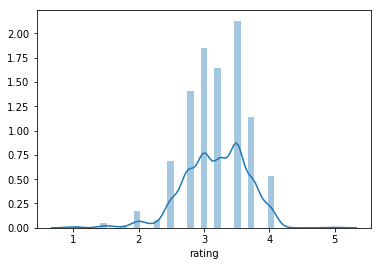

In [155]:
sns.distplot(df['rating']);

What’s the relationship between cocoa solids percentage and rating?

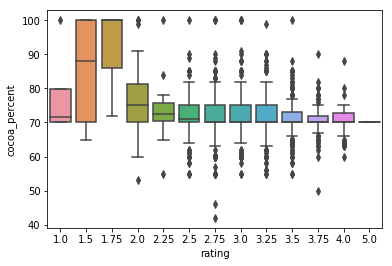

In [167]:
sns.boxplot(x = 'rating', y = 'cocoa_percent', data = df);

Which country contribute the highest-rated chocolate?



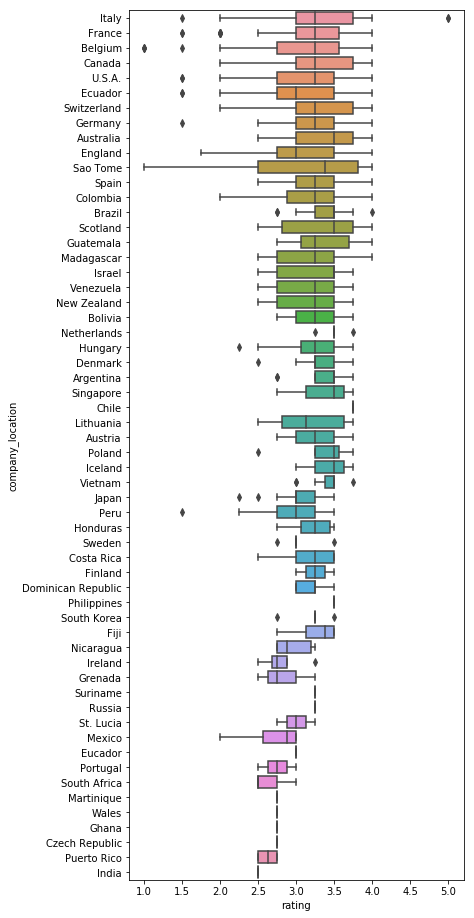

In [171]:
fig, ax = plt.subplots(figsize=[6, 16])
sns.boxplot(
    data=df.sort_values('rating', ascending=False),
    y='company_location',
    x='rating'
);